dit is in principe alles wat je nodig hebt

importeren

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime

import scipy.stats as sp
from scipy.stats import lognorm, kstest

data lezen

In [52]:
csv_data = pd.read_csv('data/adm_clean.csv', sep = ',')

# maak de datum naar een datum type
csv_data['datum_opname'] = pd.to_datetime(csv_data['datum_opname'], errors='coerce')
csv_data['datum_ontslaan'] = pd.to_datetime(csv_data['datum_ontslaan'], errors='coerce')

# calc dt and hours
csv_data['verblijftijd'] = csv_data['datum_ontslaan'] - csv_data['datum_opname']
csv_data['verblijftijd_uren'] = csv_data['verblijftijd'].dt.total_seconds() / 3600

# opname tijd in uren
csv_data.sort_values('datum_opname')
csv_data['opnametijd_delta_now'] = (csv_data['datum_opname'] - datetime.now())
csv_data['opnametijd_delta_now_hr'] = csv_data['opnametijd_delta_now'].dt.total_seconds() / 3600
csv_data['opname_delta_hr'] = (csv_data['opnametijd_delta_now_hr']-csv_data['opnametijd_delta_now_hr'].shift()).fillna(0)

#clean data
csv_data = csv_data[csv_data['verblijftijd_uren'] > 0]

csv_data.head(10)

,datum_opname,datum_ontslaan,is_gepland,afdeling,sub_afdeling,verblijfstijd,verblijftijd,verblijftijd_uren,opnametijd_delta_now,opnametijd_delta_now_hr,opname_delta_hr
0,2015-01-01 07:36:00,2015-01-02 16:43:00,unplanned,NEC,4,1 days 09:07:00.000000000,1 days 09:07:00,33.116667,-2941 days +08:23:14.762588,-70575.612566,0.000000
1,2015-01-01 14:23:59,2015-01-01 19:47:00,unplanned,INT,2,0 days 05:23:01.000000000,0 days 05:23:01,5.383611,-2941 days +15:11:13.762588,-70568.812844,6.799722
2,2015-01-01 20:30:59,2015-01-02 19:09:59,unplanned,INT,2,0 days 22:39:00.000000000,0 days 22:39:00,22.650000,-2941 days +21:18:13.762588,-70562.696177,6.116667
3,2015-01-02 12:56:00,2015-01-03 11:32:00,planned,CAPU,1,0 days 22:36:00.000000000,0 days 22:36:00,22.600000,-2940 days +13:43:14.762588,-70546.279233,16.416944
4,2015-01-02 13:12:00,2015-01-03 10:02:59,unplanned,NEC,4,0 days 20:50:59.000000000,0 days 20:50:59,20.849722,-2940 days +13:59:14.762588,-70546.012566,0.266667
5,2015-01-02 14:06:00,2015-01-03 10:21:00,planned,CAPU,1,0 days 20:15:00.000000000,0 days 20:15:00,20.250000,-2940 days +14:53:14.762588,-70545.112566,0.900000
6,2015-01-02 17:26:00,2015-01-04 13:50:59,planned,CHIR,3,1 days 20:24:59.000000000,1 days 20:24:59,44.416389,-2940 days +18:13:14.762588,-70541.779233,3.333333
7,2015-01-02 20:10:00,2015-01-05 10:09:59,planned,CAPU,1,2 days 13:59:59.000000000,2 days 13:59:59,61.999722,-2940 days +20:57:14.762588,-70539.045899,2.733333
8,2015-01-02 21:56:00,2015-01-08 21:29:59,unplanned,INT,2,5 days 23:33:59.000000000,5 days 23:33:59,143.566389,-2940 days +22:43:14.762588,-70537.279233,1.766667
9,2015-01-03 03:17:59,2015-01-05 15:24:59,unplanned,NEU,4,2 days 12:07:00.000000000,2 days 12:07:00,60.116667,-2939 days +04:05:13.762588,-70531.912844,5.366389


kansverdelingen over instroom


In [19]:
df_afdeling = csv_data['afdeling']

#gepland en ongepland
df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']

# verdelingen
print ('verdelingen df_afdeling_geplanned')
print (df_afdeling_geplanned.value_counts())

print ('\nverdelingen df_afdeling_ongeplanned')
print (df_afdeling_ongeplanned.value_counts())

#kansverdelingen
print ('\nkansverdelingen df_afdeling_geplanned')
print (df_afdeling_geplanned.value_counts(normalize=True))

print ('\nkansverdelingen df_afdeling_ongeplanned')
print (df_afdeling_ongeplanned.value_counts(normalize=True))

#totaal aantal
print ('\ntotaal aantal')
t_aantal = df_afdeling.value_counts().sum();
print (t_aantal)

print ('\ntotaal aantal df_afdeling_geplanned')
t_aantal = df_afdeling_geplanned.value_counts().sum();
print (t_aantal)

print ('\ntotaal aantal df_afdeling_ongeplanned')
t_aantal = df_afdeling_ongeplanned.value_counts().sum();
print (t_aantal)

verdelingen df_afdeling_geplanned
CAPU     1301
CHIR      118
NEC        45
INT        19
NEU         9
CARD        6
OTHER       1
Name: afdeling, dtype: int64

verdelingen df_afdeling_ongeplanned
INT      997
CHIR     448
NEU      426
CARD     317
NEC      309
CAPU     150
OTHER     53
Name: afdeling, dtype: int64

kansverdelingen df_afdeling_geplanned
CAPU     0.867912
CHIR     0.078719
NEC      0.030020
INT      0.012675
NEU      0.006004
CARD     0.004003
OTHER    0.000667
Name: afdeling, dtype: float64

kansverdelingen df_afdeling_ongeplanned
INT      0.369259
CHIR     0.165926
NEU      0.157778
CARD     0.117407
NEC      0.114444
CAPU     0.055556
OTHER    0.019630
Name: afdeling, dtype: float64

totaal aantal
4199

totaal aantal df_afdeling_geplanned
1499

totaal aantal df_afdeling_ongeplanned
2700


sub ic transformator

In [20]:
csv_data['sub-ic'] = csv_data['sub_afdeling'].map(
    {
        1:'CAPU',
        2:'CARD/INT/OTHER',
        3:'CHIR',
        4:'NEC/NEU',
    }
)

csv_data.head()

,datum_opname,datum_ontslaan,is_gepland,afdeling,sub_afdeling,verblijfstijd,verblijftijd,verblijftijd_uren,opnametijd_delta_now,opnametijd_delta_now_hr,opname_delta_hr,sub-ic
0,2015-01-01 07:36:00,2015-01-02 16:43:00,unplanned,NEC,4,1 days 09:07:00.000000000,1 days 09:07:00,33.116667,-2941 days +09:16:44.327747,-70574.721020,0.000000,NEC/NEU
1,2015-01-01 14:23:59,2015-01-01 19:47:00,unplanned,INT,2,0 days 05:23:01.000000000,0 days 05:23:01,5.383611,-2941 days +16:04:43.327747,-70567.921298,6.799722,CARD/INT/OTHER
2,2015-01-01 20:30:59,2015-01-02 19:09:59,unplanned,INT,2,0 days 22:39:00.000000000,0 days 22:39:00,22.650000,-2941 days +22:11:43.327747,-70561.804631,6.116667,CARD/INT/OTHER
3,2015-01-02 12:56:00,2015-01-03 11:32:00,planned,CAPU,1,0 days 22:36:00.000000000,0 days 22:36:00,22.600000,-2940 days +14:36:44.327747,-70545.387687,16.416944,CAPU
4,2015-01-02 13:12:00,2015-01-03 10:02:59,unplanned,NEC,4,0 days 20:50:59.000000000,0 days 20:50:59,20.849722,-2940 days +14:52:44.327747,-70545.121020,0.266667,NEC/NEU


C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']


avg for NEC is 4 days 09:35:03.200564971
avg for INT is 4 days 14:37:10.467519685


C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']


avg for CAPU is 1 days 22:25:35.807718814


C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']


avg for CHIR is 4 days 14:21:18.936395759
avg for NEU is 3 days 18:30:37.177011494


C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
C:\Users\Sep\AppData\Local\Temp\ipykernel_18192\405111048.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']


avg for CARD is 4 days 10:34:21.086687306
avg for OTHER is 2 days 12:48:02.462962962


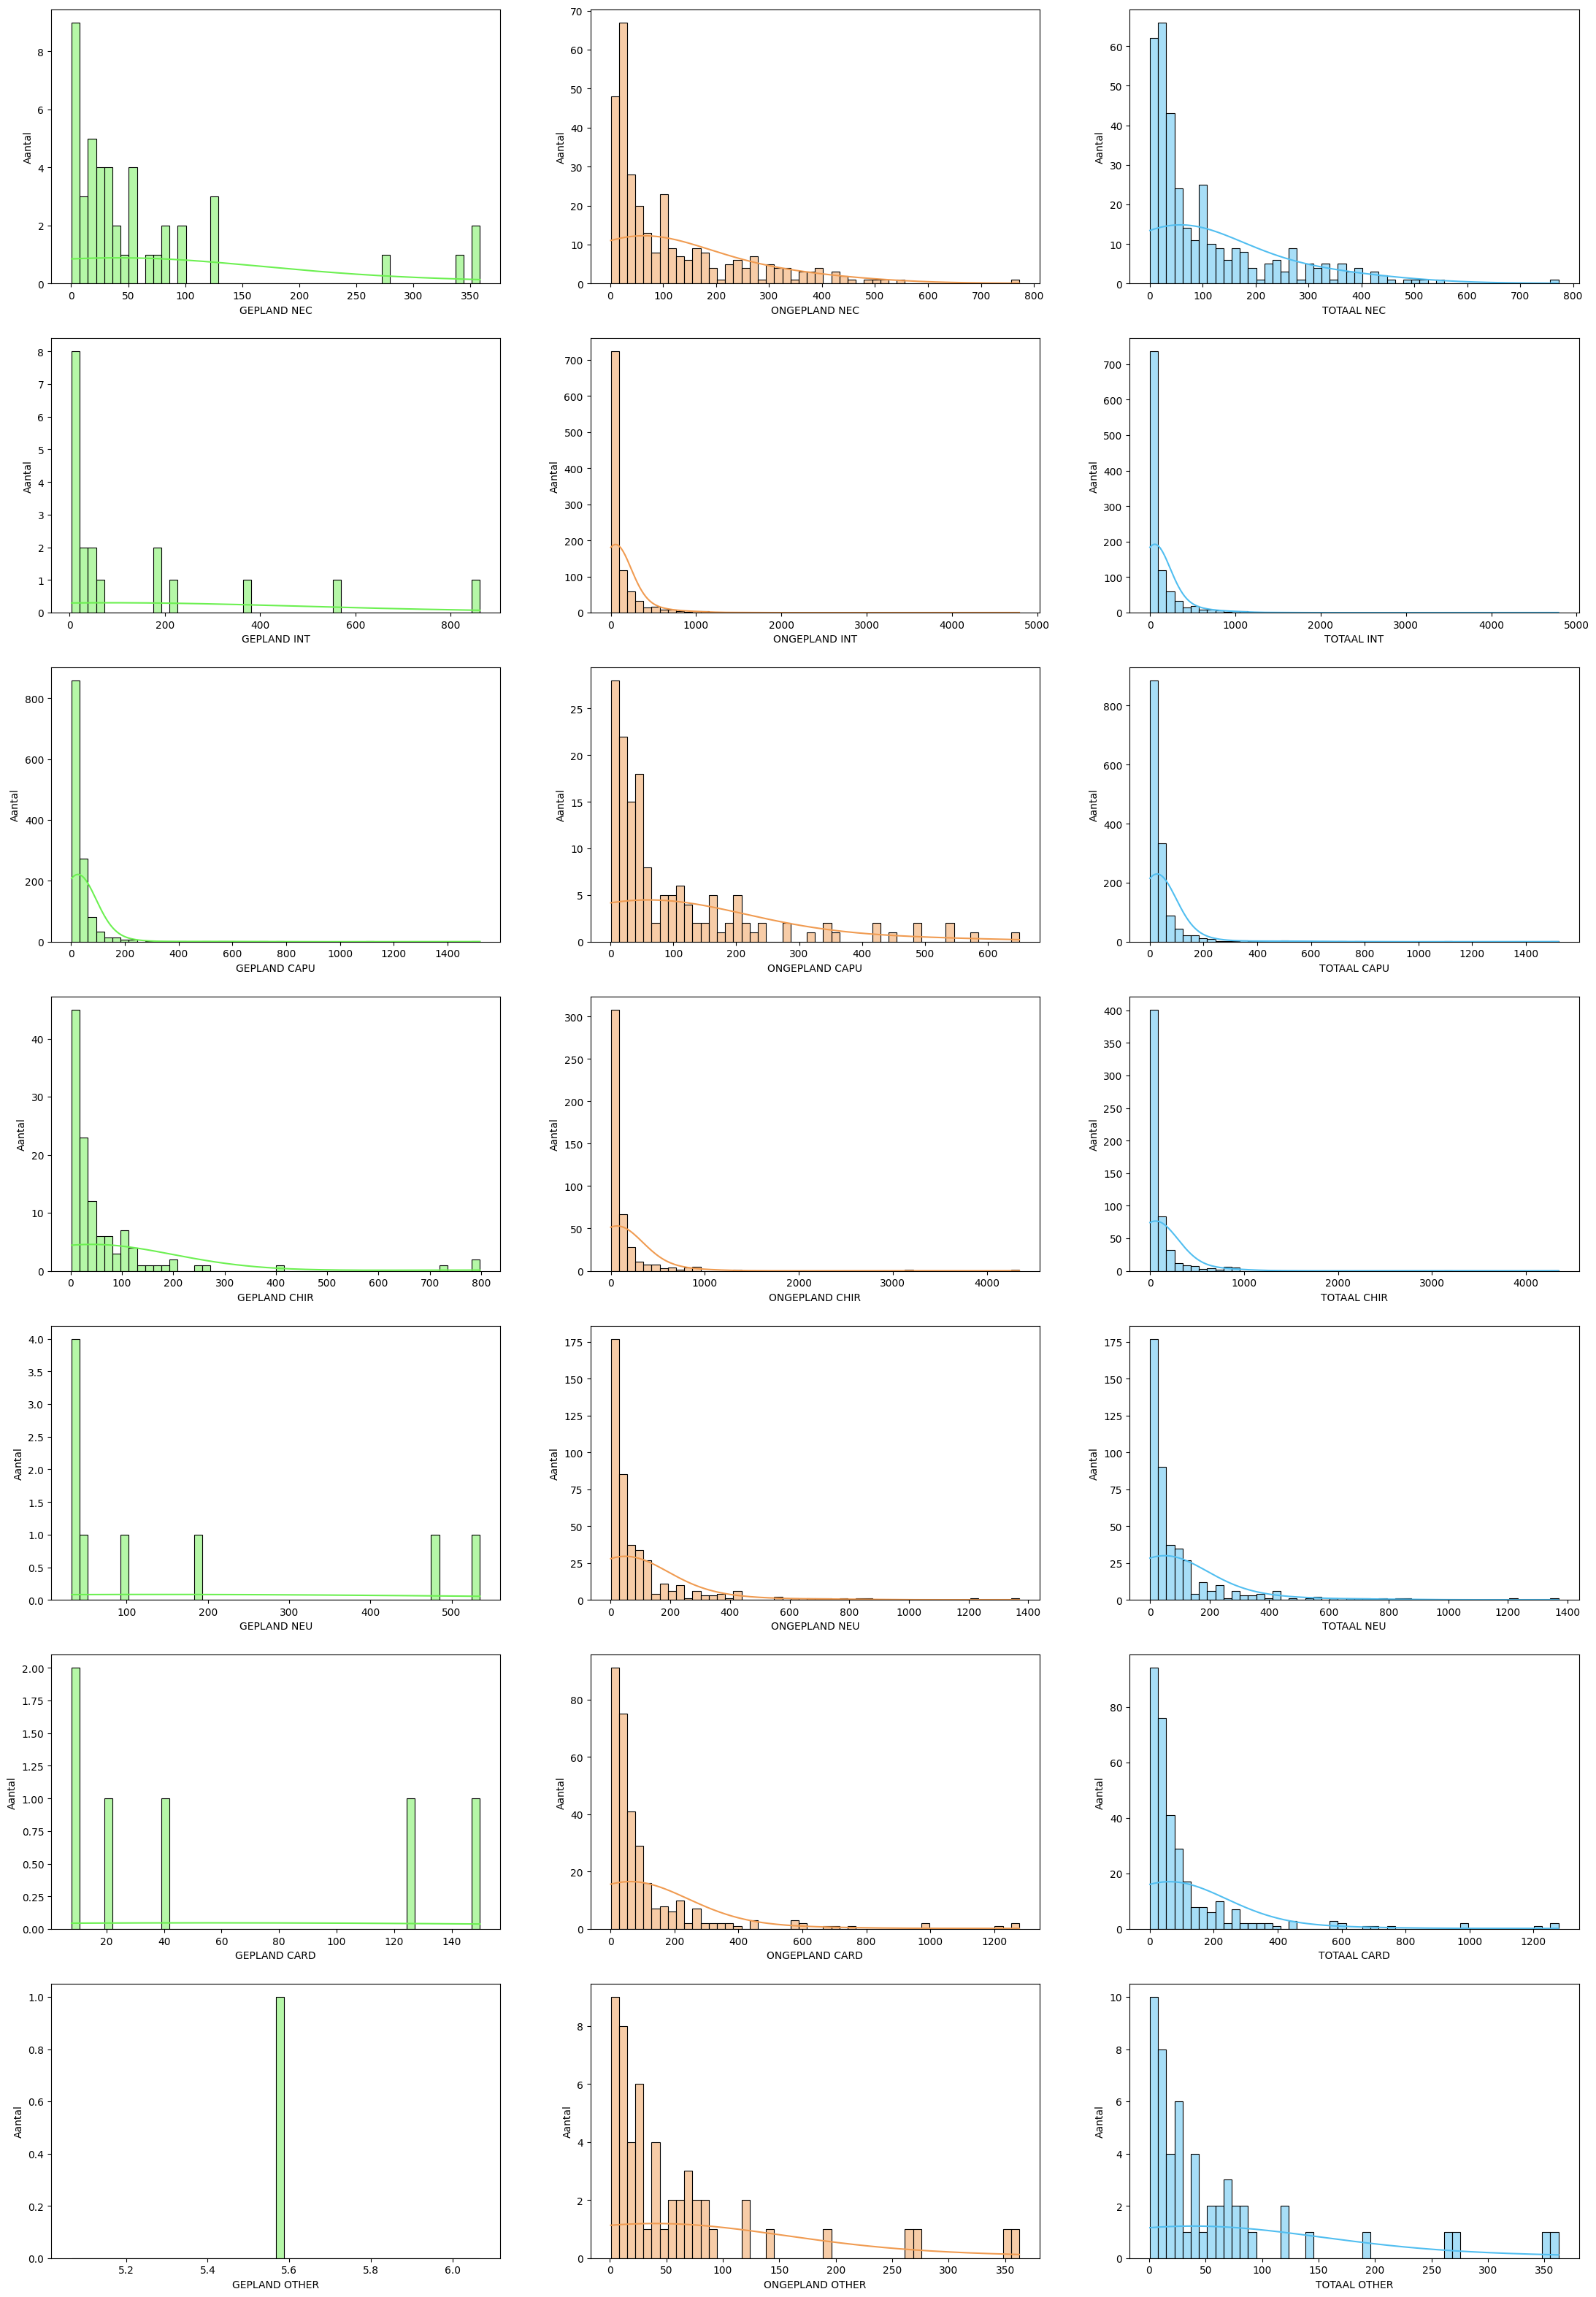

In [21]:
#get unique afdelingen
u_afdelingen = csv_data['afdeling'].unique()

#create axis
fix, axes = plt.subplots(nrows=7, ncols=3, figsize=(27,40))

#for each afdeling
for index, afdeling in enumerate(u_afdelingen):

    #get afdeling dataframe
    df_afdeling = csv_data[csv_data['afdeling'] == afdeling]
    
    #gepland en ongepland
    df_afdeling_geplanned = df_afdeling[csv_data['is_gepland'] == 'planned']
    df_afdeling_ongeplanned = df_afdeling[csv_data['is_gepland'] == 'unplanned']

    #get average stay
    avg_stay = df_afdeling['verblijftijd'].mean()

    #print
    print('avg for {} is {}'.format(afdeling, avg_stay))
    
    #plot uren
    sns.histplot(data=df_afdeling_geplanned, 
             x='verblijftijd_uren',
             kde=True,
             ax=axes[index, 0],
             bins=50,
             color='#6cf051',
             kde_kws={'bw_adjust': 3})\
    .set(ylabel='Aantal', xlabel="GEPLAND " + afdeling)

    #plot uren 2
    sns.histplot(data=df_afdeling_ongeplanned, 
             x='verblijftijd_uren',
             kde=True,
             ax=axes[index, 1],
             bins=50,
             color='#f09b51',
             kde_kws={'bw_adjust': 3})\
    .set(ylabel='Aantal', xlabel="ONGEPLAND " + afdeling)
    
    #plot uren
    sns.histplot(data=df_afdeling, 
             x='verblijftijd_uren',
             kde=True,
             ax=axes[index, 2],
             bins=50,
             color='#51bef0',
             kde_kws={'bw_adjust': 3})\
    .set(ylabel='Aantal', xlabel="TOTAAL " + afdeling)


Het ziet eruit alsof de data lognorm distributed is. om dit vast te stellen gaan we dit op de proef stellen.

Met een lognorm functie kunnen we zo data genereren
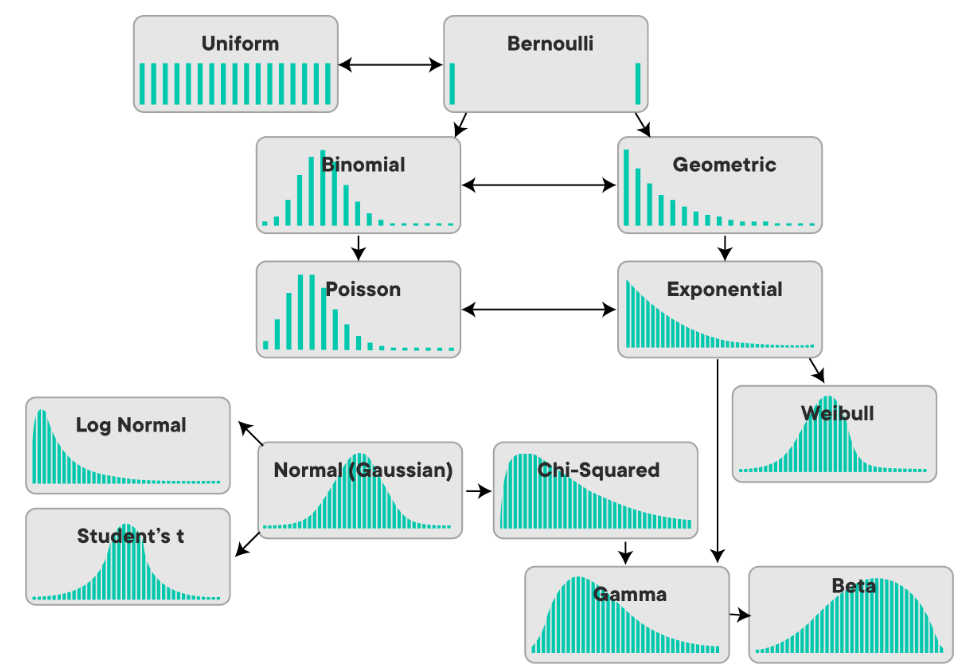

voor alle


3.50502901187668
1.3165461050924663


3.4896641488846436
1.28194215495338


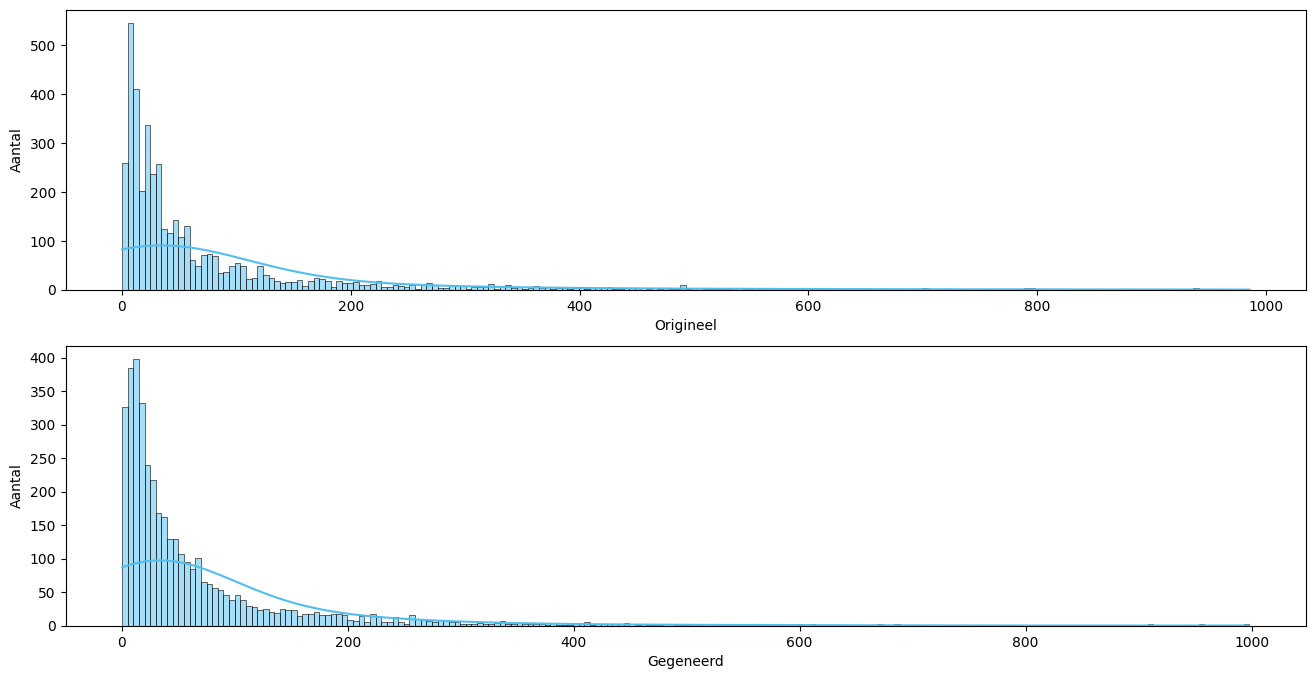

In [22]:

#filter outliers
csv_data_filtered = csv_data[csv_data['verblijftijd_uren'] < 1000]
df_aantaluren_opic = csv_data_filtered['verblijftijd_uren']

def for_data(data):

    #onze data
    fix, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
    sns.histplot(data=data, 
                kde=True,
                bins=200,
                ax=axes[0],
                color='#51bef0',
                kde_kws={'bw_adjust': 3})\
    .set(ylabel='Aantal', xlabel="Origineel")

    #get our mean
    our_mean = np.mean(data);
    our_stdv = np.std(data);

    #get info from our data
    shape, location, scale = sp.lognorm.fit(data)
    mu, sigma = np.log(scale), shape

    #print
    print("\n")
    print(mu)
    print(sigma)

    #nagebootst
    s = np.random.lognormal(mu, sigma, 4000)
    s = [x for x in s if (x < 1000)]

    #plot
    sns.histplot(data=s, 
                kde=True,
                bins=200,
                ax=axes[1],
                color='#51bef0',
                kde_kws={'bw_adjust': 3})\
    .set(ylabel='Aantal', xlabel="Gegeneerd")

    #get info
    shape, location, scale = sp.lognorm.fit(s)
    mu, sigma = np.log(scale), shape

    #print
    print("\n")
    print(mu)
    print(sigma)

    #run fitness test
    #K-S should be a high value (Max =1.0) when the fit is good and a low value (Min = 0.0) when the fit is not good. When the K-S value goes below 0.05, you will be informed that the Lack of fit is significant.
    kstest(df_aantaluren_opic, "lognorm", sp.lognorm.fit(df_aantaluren_opic))

    #onze fit is 0.09 wat betekent dat het een lognormal dist kan zijn


df_afdeling_ongeplanned = df_aantaluren_opic[csv_data['is_gepland'] == 'unplanned']
df_afdeling_geplanned = df_aantaluren_opic[csv_data['is_gepland'] == 'planned']

print("voor alle")
for_data(df_aantaluren_opic)

#print("voor ongepland")
#for_data(df_afdeling_ongeplanned)

#print("voor gepland")
#for_data(df_afdeling_geplanned)

conclusie: woah het was een lognorm dingus
hatskidee
nu nog de verdeling van interval tussen patienten

The exponential distribution is a probability distribution that is used to model the time we must wait until a certain event occurs

wss exponential distribution
https://openstax.org/books/introductory-business-statistics/pages/5-3-the-exponential-distribution#:~:text=The%20formula%20for%20the%20exponential,%CE%BC%20%3D%20average%20time%20between%20occurrences.

sum of orig 17528.533055555563
mean 6.492049279835394
sum of sample 17984.161700778943
sum of orig 17477.78305555555
mean 11.659628456007704
sum of sample 18263.52023447474
sum of orig 16451.014722222186
mean 3.9178410865020687
sum of sample 16512.292095973222


,datum_opname,datum_ontslaan,is_gepland,afdeling,sub_afdeling,verblijfstijd,verblijftijd,verblijftijd_uren,opnametijd_delta_now,opnametijd_delta_now_hr,opname_delta_hr,opname_delta_hr_2
3,2015-01-02 12:56:00,2015-01-03 11:32:00,planned,CAPU,1,0 days 22:36:00.000000000,0 days 22:36:00,22.600000,-2940 days +13:43:14.762588,-70546.279233,0.000000,16.416944
5,2015-01-02 14:06:00,2015-01-03 10:21:00,planned,CAPU,1,0 days 20:15:00.000000000,0 days 20:15:00,20.250000,-2940 days +14:53:14.762588,-70545.112566,1.166667,0.900000
6,2015-01-02 17:26:00,2015-01-04 13:50:59,planned,CHIR,3,1 days 20:24:59.000000000,1 days 20:24:59,44.416389,-2940 days +18:13:14.762588,-70541.779233,3.333333,3.333333
7,2015-01-02 20:10:00,2015-01-05 10:09:59,planned,CAPU,1,2 days 13:59:59.000000000,2 days 13:59:59,61.999722,-2940 days +20:57:14.762588,-70539.045899,2.733333,2.733333
12,2015-01-03 22:59:00,2015-01-27 15:09:59,planned,INT,2,23 days 16:10:59.000000000,23 days 16:10:59,568.183056,-2939 days +23:46:14.762588,-70512.229233,26.816667,1.416944


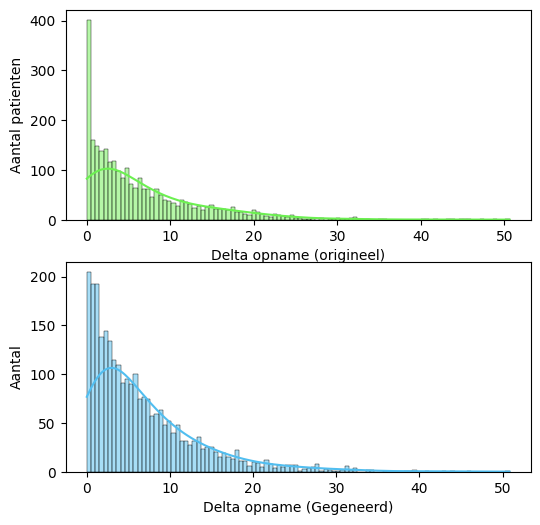

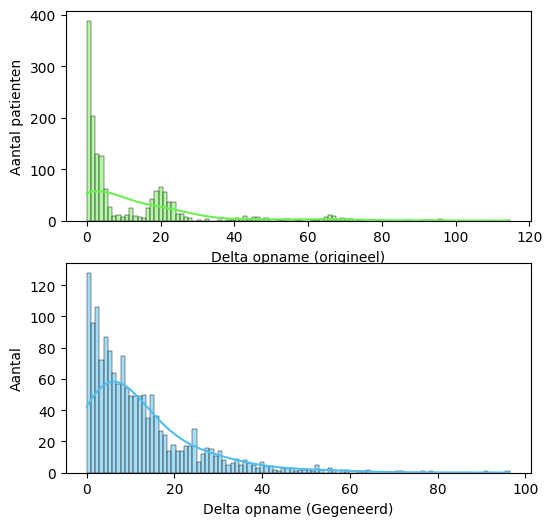

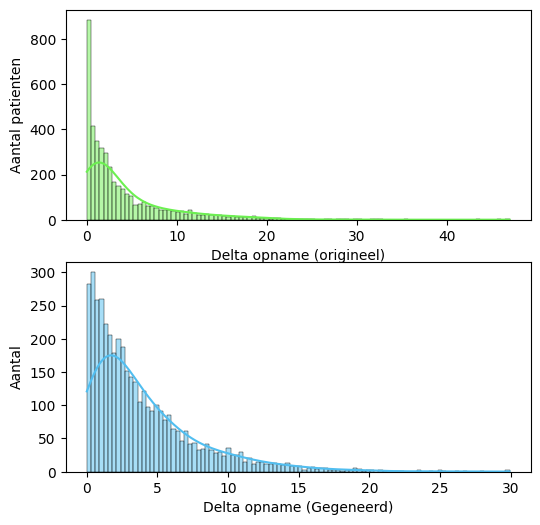

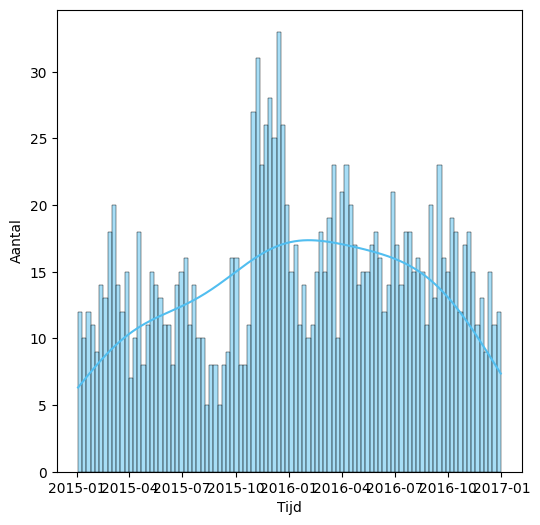

In [72]:

def calc_delta(data):
    
    #create axis
    fix, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,6))

    #plot uren
    sns.histplot(data=data, 
                x='opname_delta_hr',
                kde=True,
                bins=100,
                ax=axes[0],
                color='#6cf051',
                kde_kws={'bw_adjust': 2})\
    .set(ylabel='Aantal patienten', xlabel="Delta opname (origineel)")

    #get data
    df_opane_delta_uur = data['opname_delta_hr']

    # sum is wel hetzelfde
    print("sum of orig " + str(df_opane_delta_uur.sum()))

    #calc mean and sample
    mean = np.mean(df_opane_delta_uur)
    print("mean " + str(mean))

    #create sample
    n_sample = np.random.exponential(mean, data.value_counts().sum())

    #print sample sum
    print("sum of sample " + str(n_sample.sum()))

    #plot
    sns.histplot(data=n_sample, 
                kde=True,
                bins=100,
                ax=axes[1],
                color='#51bef0',
                kde_kws={'bw_adjust': 2})\
    .set(ylabel='Aantal', xlabel="Delta opname (Gegeneerd)")


#calc voor ongeplanned en geplanned
#calc sub delta's voor groepen
df_afdeling_ongeplanned = csv_data[csv_data['is_gepland'] == 'unplanned'].copy()
df_afdeling_ongeplanned['opname_delta_hr'] = (df_afdeling_ongeplanned['opnametijd_delta_now_hr']-df_afdeling_ongeplanned['opnametijd_delta_now_hr'].shift()).fillna(0)
df_afdeling_geplanned = csv_data[csv_data['is_gepland'] == 'planned'].copy()
df_afdeling_geplanned['opname_delta_hr'] = (df_afdeling_geplanned['opnametijd_delta_now_hr']-df_afdeling_geplanned['opnametijd_delta_now_hr'].shift()).fillna(0)

#calc deltas
calc_delta(df_afdeling_ongeplanned)
calc_delta(df_afdeling_geplanned)
calc_delta(csv_data)

#test plot time
fix, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.histplot(data=df_afdeling_geplanned, 
            x='datum_opname',
            kde=True,
            bins=100,
            color='#51bef0',
            kde_kws={'bw_adjust': 2})\
.set(ylabel='Aantal', xlabel="Tijd")

#show head
df_afdeling_geplanned.head()


gemiddelde opname lambda parameter is bij ongeplande hoger